# Soil moisture investigation

I have become increasingly skeptical that my current method is working for calculating the soil moisture fraction using ERA5-Land data is wrong. My reasoning is the following.

One can parameterize the soil moisture content in a variety of ways. ERA5-Land provides the volumetric soil water layer in m$^{3}$/m$^{3}$, assumed to be meters cubed of water over meters cubed of soil; it's a ratio of densities, essentially. However, in our model we parameterize the amount of water in the soil as $\Theta = \mu m$, where *m* is the fraction of soil saturation (between 0 and 1) and $\mu$ is the maximum water content.

So if the soil moisture content measurement taken in volumetric units is $\theta$, our *m* is given by
\begin{equation}
m = \dfrac{\theta}{\mu}.
\end{equation}

Hence, from ERA5-Land, we need to estimate $\mu$ all over the globe. Lucas (in an email) said to measure it by simply taking the max of the monthly mean $\theta$. However, I think this is not correct; I find it hard to believet that the average amount of soil moisture in **an entire month** is equal the maximum. It is far more likely that the maximum soil moisture content (prior to supersaturation) is given on hourly timescales, i.e., right after a rain event.

This however raises the issue of supersaturation -- how do we distinguish between soil that is saturated and soil that is supersaturated? That's the aim of this notebook. To understand how saturated and supersaturated soil arises in the data, and how to tell the difference. If we can find a way to determine when the soil is approximately saturated, then we can properly measure $\mu$ all over the globe in ERA5-Land, and thus, gain an accurate time series for *m*, our desired variable.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 
import glob 
import cartopy
import cartopy.crs as ccrs 

import sys
sys.path.append("/data/keeling/a/adammb4/heatwaves-physics/src/")
from getDataProcessing import *

In [3]:
# import data
era5_PATH="/data/keeling/a/adammb4/heatwaves-physics/data/era5/"
era5land_dataname = glob.glob(era5_PATH+"dewpt*")

era5land_data = xr.open_dataset(era5land_dataname[0])

In [4]:
era5land_data

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 122)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2021-07-01
Data variables:
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
    sshf       (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-06 17:42:26 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

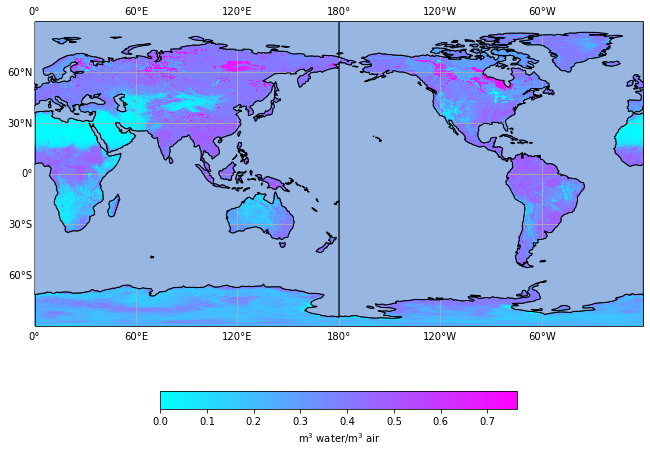

In [8]:
fig1=plt.figure(figsize=(16,8))
ax1=plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax1.coastlines()
ax1.add_feature(cartopy.feature.OCEAN,zorder=100,edgecolor='k')    
ax1.gridlines(draw_labels=True)
era5land_data.swvl1.max(axis=0).plot(ax=ax1,transform=ccrs.PlateCarree(),cmap='cool',
              cbar_kwargs={'label':r'm$^{3}$ water/m$^{3}$ air','shrink':0.4,'orientation':'horizontal'})

In [5]:
mois_data = era5land_data["swvl1"].values